In [0]:
datadir = '/home'

train_dir = datadir + '/train'
validation_dir = datadir + '/validation'

train_cats_dir = datadir + '/train/cat/'
train_dogs_dir = datadir + '/train/dog'

validation_cats_dir = datadir + '/validation/cat'
validation_dogs_dir = datadir + '/validation/dog'

test_cats_dir = datadir + '/test/cat'
test_dogs_dir = datadir + '/test/dog'

In [2]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
  input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxP

In [0]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
  optimizer=optimizers.RMSprop(lr=1e-4),
  metrics=['acc'])

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
  rescale=1./255,
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=(150, 150),
  batch_size=20,
  class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
  validation_dir,
  target_size=(150, 150),
  batch_size=20,
  class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
history = model.fit_generator(
  train_generator,
  steps_per_epoch=100,
  epochs=100,
  validation_data=validation_generator,
  validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
100/100 [==============================] - 20s 199ms/step - loss: 0.6950 - acc: 0.5150 - val_loss: 0.6869 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 16s 156ms/step - loss: 0.6861 - acc: 0.5480 - val_loss: 0.6841 - val_acc: 0.5630
Epoch 3/100
100/100 [==============================] - 16s 165ms/step - loss: 0.6761 - acc: 0.5645 - val_loss: 0.6599 - val_acc: 0.5980
Epoch 4/100
100/100 [==============================] - 16s 161ms/step - loss: 0.6686 - acc: 0.5955 - val_loss: 0.6440 - val_acc: 0.6240
Epoch 5/100
100/100 [==============================] - 15s 154ms/step - loss: 0.6587 - acc: 0.6085 - val_loss: 0.6376 - val_acc: 0.6150
Epoch 6/100
100/100 [==============================] - 15s 154ms/step - loss: 0.6370 - acc: 0.6395 - val_loss: 0.6324 - val_acc: 0.6000
Epoch 7/100
100/100 [==============================] - 15s 154ms/step - loss: 0.6246 - acc: 0.6510 - val_loss: 0.6147 - val_acc: 0.6480


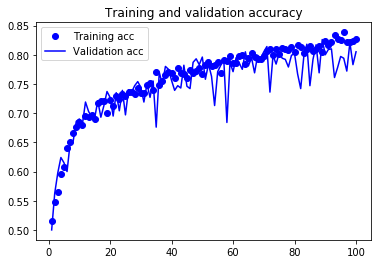

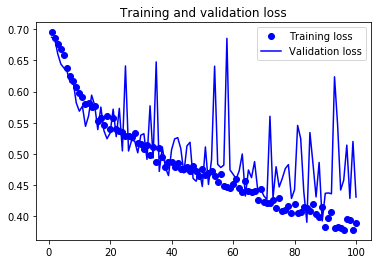

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
